In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuralprophet import NeuralProphet

In [82]:
f=pd.read_csv(r"C:\Users\DELL\Documents\austin_weather.csv")
s=f.replace(np.nan,0)
print(s.head())

         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  SeaLevelPressureAvgInches SeaLevelPressureLowInches Visibili

In [83]:
s.Date.unique()

array(['2013-12-21', '2013-12-22', '2013-12-23', ..., '2017-07-29',
       '2017-07-30', '2017-07-31'], dtype=object)

In [84]:
s.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [85]:
s['Date']=pd.to_datetime(s['Date'])
print(s.dtypes)

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                         object
DewPointAvgF                          object
DewPointLowF                          object
HumidityHighPercent                   object
HumidityAvgPercent                    object
HumidityLowPercent                    object
SeaLevelPressureHighInches            object
SeaLevelPressureAvgInches             object
SeaLevelPressureLowInches             object
VisibilityHighMiles                   object
VisibilityAvgMiles                    object
VisibilityLowMiles                    object
WindHighMPH                           object
WindAvgMPH                            object
WindGustMPH                           object
PrecipitationSumInches                object
Events                                object
dtype: object


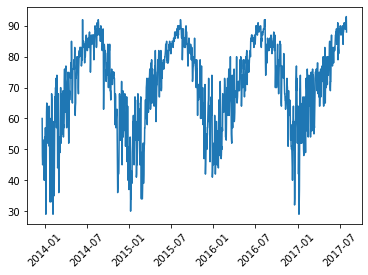

In [86]:
plt.plot(s['Date'], s['TempAvgF'])
plt.xticks(rotation=45)
plt.show()

THIS FIRST BATCH WOULD FORECAST THE TEMPERATURE OF THE NEXT 1500 DAYS USING THE NEURAL PROPHET MODEL

In [87]:
t=s[['Date', 'TempAvgF']]
print(t)

           Date  TempAvgF
0    2013-12-21        60
1    2013-12-22        48
2    2013-12-23        45
3    2013-12-24        46
4    2013-12-25        50
...         ...       ...
1314 2017-07-27        89
1315 2017-07-28        91
1316 2017-07-29        92
1317 2017-07-30        93
1318 2017-07-31        88

[1319 rows x 2 columns]


In [88]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [89]:
t.columns=['ds', 'y']

In [99]:
n=NeuralProphet()
model=n.fit(t, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 178


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.97E-02, min: 2.34E+00


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.97E-02, min: 8.81E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.30E-02
Epoch[178/178]: 100%|██████████| 178/178 [00:23<00:00,  7.67it/s, SmoothL1Loss=0.00615, MAE=4.94, RMSE=6.58, RegLoss=0]


In [101]:
o=n.make_future_dataframe(t, periods=1500)
j=n.predict(o)
j.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\DELL\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1495,2021-09-04,None,78.639763,NaN,67.002045,12.032278,-0.394559
1496,2021-09-05,None,78.390656,NaN,66.997986,11.818533,-0.425863
1497,2021-09-06,None,78.677780,NaN,66.993919,11.606833,0.077023
1498,2021-09-07,None,78.769302,NaN,66.989853,11.397786,0.381662
1499,2021-09-08,None,78.414032,NaN,66.985794,11.191937,0.236306


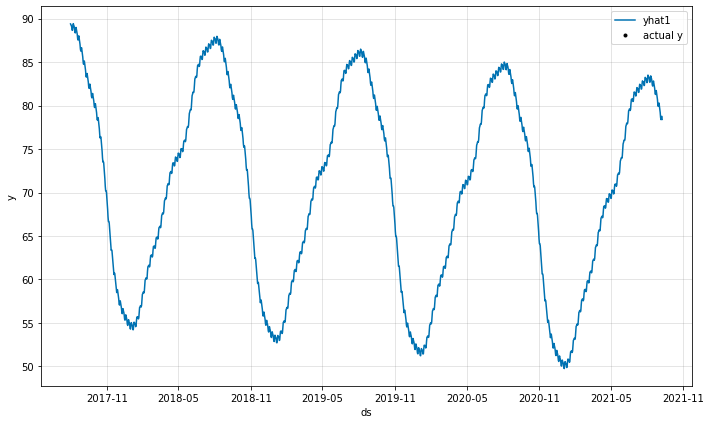

In [102]:
i=n.plot(j)

THIS SECOND BATCH WOULD DEPICT THE FORECASTING OF EITHER RAINFALL, THUNDERSTORM, OR BOTH USING THE NEURAL PROPHET MODEL

In [71]:
k=s[['Date', 'PrecipitationSumInches']]
print(k)

           Date PrecipitationSumInches
0    2013-12-21                   0.46
1    2013-12-22                      0
2    2013-12-23                      0
3    2013-12-24                      0
4    2013-12-25                      T
...         ...                    ...
1314 2017-07-27                      0
1315 2017-07-28                      0
1316 2017-07-29                      0
1317 2017-07-30                      0
1318 2017-07-31                      0

[1319 rows x 2 columns]


In [72]:
k['PrecipitationSumInches']=k['PrecipitationSumInches'].replace(['T'], [0])
print(k)

WARNING - (py.warnings._showwarnmsg) - C:\Users\DELL\AppData\Local\Temp\ipykernel_5140\2264787645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['PrecipitationSumInches']=k['PrecipitationSumInches'].replace(['T'], [0])



           Date PrecipitationSumInches
0    2013-12-21                   0.46
1    2013-12-22                      0
2    2013-12-23                      0
3    2013-12-24                      0
4    2013-12-25                      0
...         ...                    ...
1314 2017-07-27                      0
1315 2017-07-28                      0
1316 2017-07-29                      0
1317 2017-07-30                      0
1318 2017-07-31                      0

[1319 rows x 2 columns]


In [73]:
k.columns=['ds', 'y']

In [74]:
n=NeuralProphet()
model=n.fit(k, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 178


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.24E-01, min: 1.69E+00


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.24E-01, min: 1.44E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.16E-01
Epoch[178/178]: 100%|█████████| 178/178 [00:23<00:00,  7.61it/s, SmoothL1Loss=0.0908, MAE=0.154, RMSE=0.367, RegLoss=0]


In [76]:
o=n.make_future_dataframe(k, periods=15)
j=n.predict(o)
j.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 93.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 93.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\DELL\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
10,2017-08-11,None,0.014603,NaN,0.069696,-0.043513,-0.011580
11,2017-08-12,None,0.048646,NaN,0.069812,-0.041285,0.020119
12,2017-08-13,None,0.037820,NaN,0.069928,-0.039076,0.006969
13,2017-08-14,None,0.041315,NaN,0.070043,-0.036896,0.008168
14,2017-08-15,None,0.040012,NaN,0.070159,-0.034757,0.004610


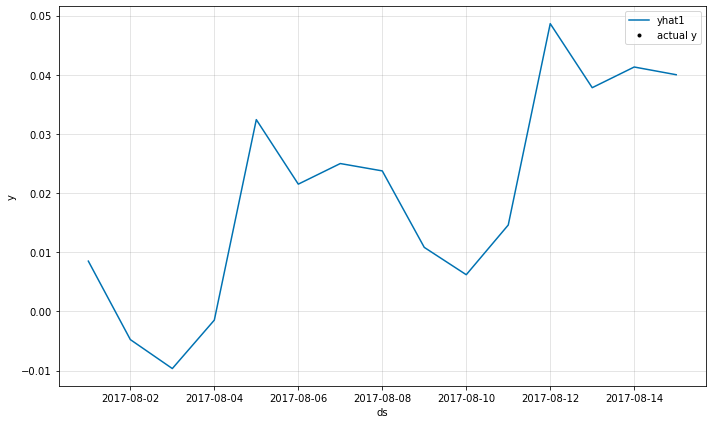

In [77]:
i=n.plot(j)